In [2]:
import pandas as pd
import numpy as np
import scipy as scp
import rotina_doe as d
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Plan.xlsx")
X = df.iloc[:,:-3].copy()
y = df.iloc[:,-3].copy()
X["int"] = 1
X.drop("Run", axis = 1, inplace = True)

In [4]:
replicas_l, index_r, replicas, descr = d.replicas(X,y)

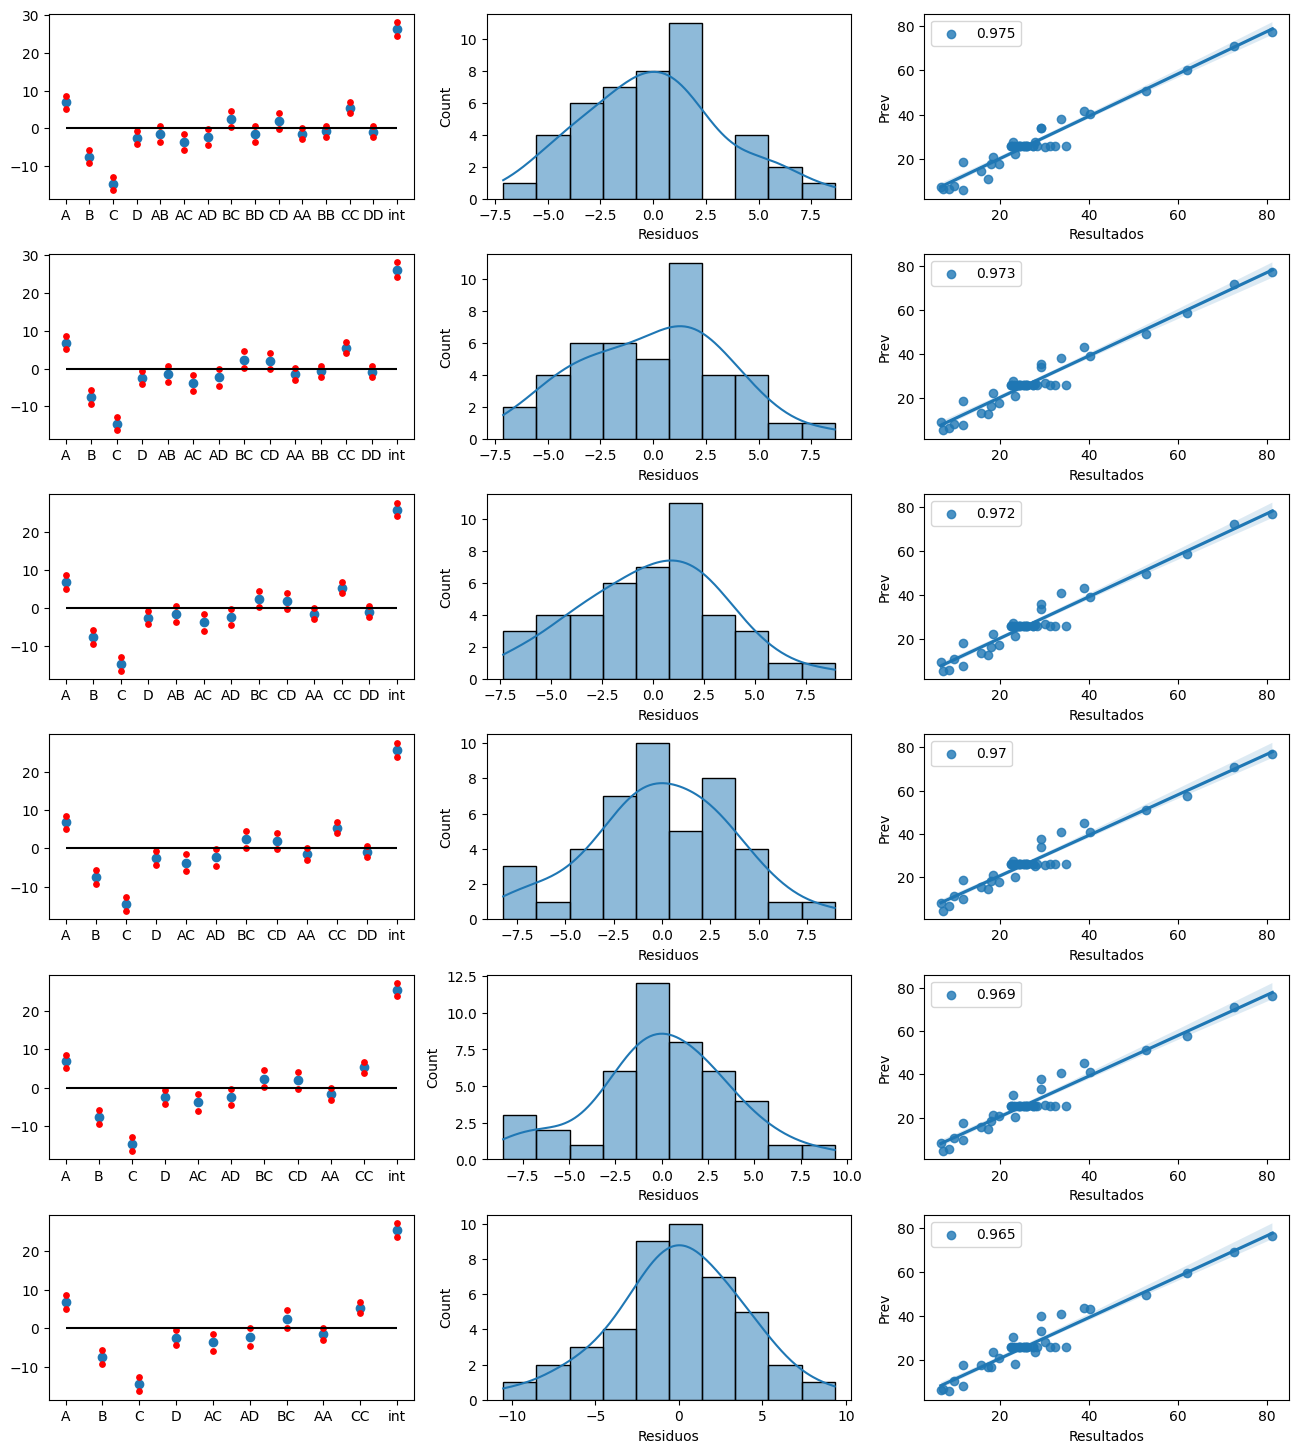

In [5]:
reg, prev = d.super_DoE(X,y)

In [6]:
coef = pd.DataFrame(reg[-1], index = ["A", "B", "C", "D", "AC", "AD", "BC", "AA", "CC", "int"], columns = ["coef", "var", "erro","IC", "dif"])
coef

,coef,var,erro,IC,dif
A,6.877500,0.821984,0.906634,1.844560,5.032940
B,-7.534167,0.821984,0.906634,1.844560,5.689607
C,-14.604167,0.821984,0.906634,1.844560,12.759607
D,-2.454167,0.821984,0.906634,1.844560,0.609607
AC,-3.708750,1.232977,1.110395,2.259115,1.449635
AD,-2.348750,1.232977,1.110395,2.259115,0.089635
BC,2.388750,1.232977,1.110395,2.259115,0.129635
AA,-1.553558,0.569066,0.754365,1.534767,0.018791
CC,5.346442,0.569066,0.754365,1.534767,3.811676
int,25.493654,0.758755,0.871065,1.772196,23.721458


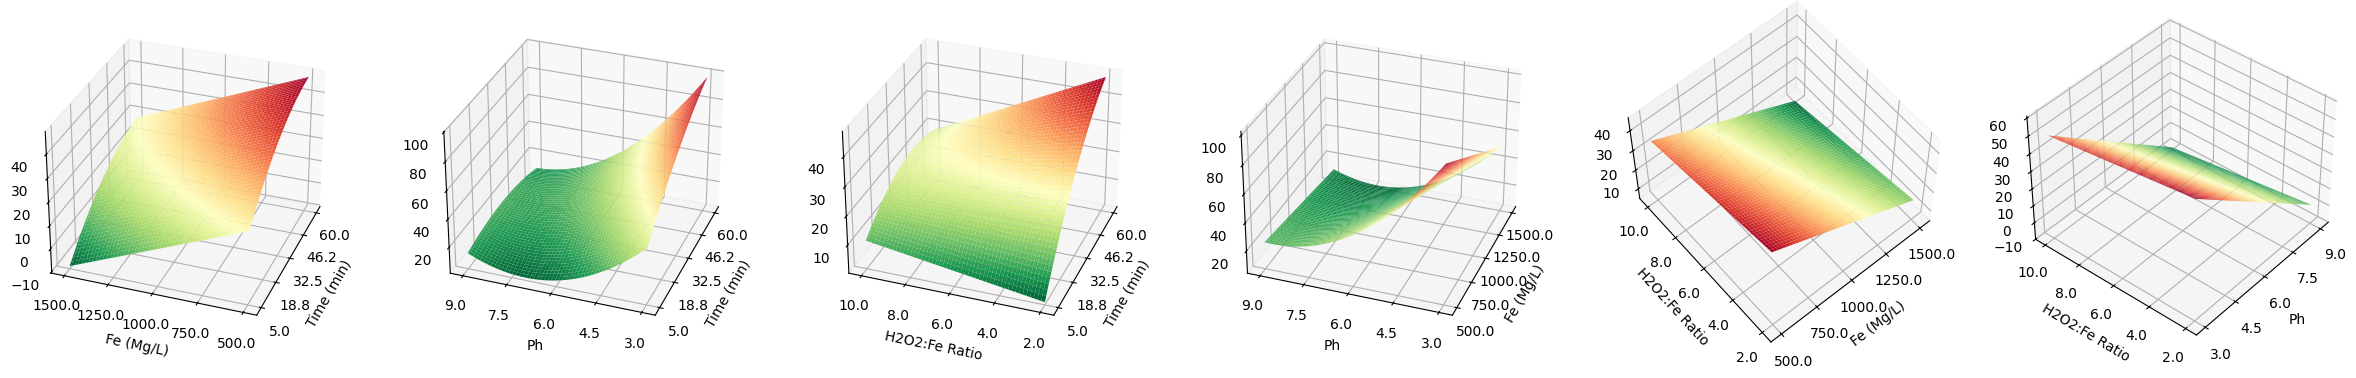

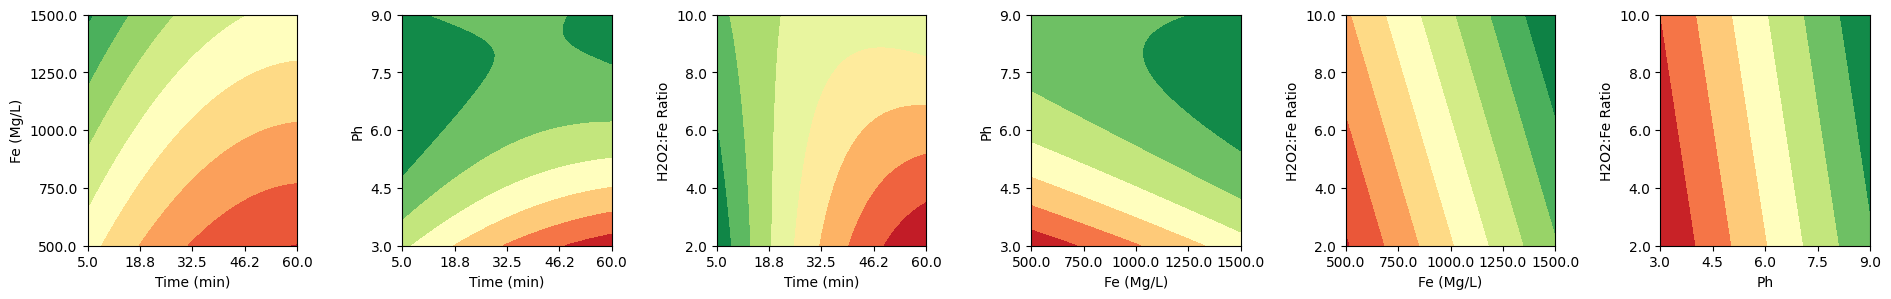

In [56]:
import plotly.graph_objects as go

x_v = np.linspace(-2,2,100)
y_v = np.linspace(-2,2,100)
Xs, Ys = np.meshgrid(x_v, y_v)

A = coef.loc["A","coef"]
B = coef.loc["B","coef"]
C = coef.loc["C","coef"]
D = coef.loc["D","coef"]
AC = coef.loc["AC","coef"]
AD = coef.loc["AD","coef"]
BC = coef.loc["BC","coef"]
AA = coef.loc["AA","coef"]
CC = coef.loc["CC","coef"]
inter = coef.loc["int","coef"]

respAB = inter + (A*Xs) + (B*Ys) + (AA*Xs*Xs)
respAC = inter + (A*Xs) + (C*Ys) + (AC*Xs*Ys) + (AA*Xs*Xs) + (CC*Ys*Ys)
respAD = inter + (A*Xs) + (D * Ys) + (AD *Xs*Ys) + (AA*Xs*Xs)
respBC = inter + (B*Xs) + (C*Ys) + (BC*Xs*Ys) + (CC*Ys*Ys)
respBD = inter + (B*Xs) + (D*Ys)
respCD = inter + (C*Xs) + (D*Ys)

timeticks = np.linspace(5,60,5).round(1)
Feticks = np.linspace(500,1500,5).round(1)
Phticks = np.linspace(3,9,5).round(1)
ratioticks = np.linspace(2,10,5).round(1)
geralticks = np.linspace(-2,2,5).round(1)

figura1, axis = plt.subplots(1,6, figsize = (30,10), subplot_kw = {"projection": "3d"})

axis[0].plot_surface(Xs, Ys, respAB, cmap = "RdYlGn_r")
axis[0].view_init( azim = 20)
axis[0].set_xticks(geralticks, timeticks)
axis[0].set_yticks(geralticks, Feticks)
axis[0].invert_xaxis()
axis[0].invert_yaxis()
axis[0].set(xlabel = "Time (min)", ylabel = "Fe (Mg/L)")

axis[1].plot_surface(Xs, Ys, respAC, cmap = "RdYlGn_r")
axis[1].view_init( azim = 20)
axis[1].set_xticks(geralticks, timeticks)
axis[1].set_yticks(geralticks, Phticks)
axis[1].invert_xaxis()
axis[1].invert_yaxis()
axis[1].set(xlabel = "Time (min)", ylabel = "Ph")

axis[2].plot_surface(Xs, Ys, respAD, cmap = "RdYlGn_r")
axis[2].view_init( azim = 20)
axis[2].set_xticks(geralticks, timeticks)
axis[2].set_yticks(geralticks, ratioticks)
axis[2].invert_xaxis()
axis[2].invert_yaxis()
axis[2].set(xlabel = "Time (min)", ylabel = "H2O2:Fe Ratio")

axis[3].plot_surface(Xs, Ys, respBC, cmap = "RdYlGn_r")
axis[3].view_init( azim = 20)
axis[3].set_xticks(geralticks, Feticks)
axis[3].set_yticks(geralticks, Phticks)
axis[3].invert_xaxis()
axis[3].invert_yaxis()
axis[3].set(xlabel = "Fe (Mg/L)", ylabel = "Ph")

axis[4].plot_surface(Xs, Ys, respBD, cmap = "RdYlGn_r")
axis[4].view_init(elev = 60, azim = 50)
axis[4].set_xticks(geralticks, Feticks)
axis[4].set_yticks(geralticks, ratioticks)
axis[4].invert_xaxis()
axis[4].invert_yaxis()
axis[4].set(xlabel = "Fe (Mg/L)", ylabel = "H2O2:Fe Ratio")

axis[5].plot_surface(Xs, Ys, respCD, cmap = "RdYlGn_r")
axis[5].view_init(elev = 40, azim = 40)
axis[5].set_xticks(geralticks, Phticks)
axis[5].set_yticks(geralticks, ratioticks)
axis[5].invert_xaxis()
axis[5].invert_yaxis()
axis[5].set(xlabel = "Ph", ylabel = "H2O2:Fe Ratio")

figura2, axis = plt.subplots(1,6, figsize = (23,3))
figura2.subplots_adjust(wspace = 0.5)

axis[0].contourf(Xs, Ys, respAB, cmap = "RdYlGn_r")
axis[0].set_xticks(geralticks, timeticks)
axis[0].set_yticks(geralticks, Feticks)
axis[0].set(xlabel = "Time (min)", ylabel = "Fe (Mg/L)")

axis[1].contourf(Xs, Ys, respAC, cmap = "RdYlGn_r")
axis[1].set_xticks(geralticks, timeticks)
axis[1].set_yticks(geralticks, Phticks)
axis[1].set(xlabel = "Time (min)", ylabel = "Ph")

axis[2].contourf(Xs, Ys, respAD, cmap = "RdYlGn_r")
axis[2].set_xticks(geralticks, timeticks)
axis[2].set_yticks(geralticks, ratioticks)
axis[2].set(xlabel = "Time (min)", ylabel = "H2O2:Fe Ratio")

axis[3].contourf(Xs, Ys, respBC, cmap = "RdYlGn_r")
axis[3].set_xticks(geralticks, Feticks)
axis[3].set_yticks(geralticks, Phticks)
axis[3].set(xlabel = "Fe (Mg/L)", ylabel = "Ph")

axis[4].contourf(Xs, Ys, respBD, cmap = "RdYlGn_r")
axis[4].set_xticks(geralticks, Feticks)
axis[4].set_yticks(geralticks, ratioticks)
axis[4].set(xlabel = "Fe (Mg/L)", ylabel = "H2O2:Fe Ratio")

axis[5].contourf(Xs, Ys, respCD, cmap = "RdYlGn_r")
axis[5].set_xticks(geralticks, Phticks)
axis[5].set_yticks(geralticks, ratioticks)
axis[5].set(xlabel = "Ph", ylabel = "H2O2:Fe Ratio")

plt.show()

In [68]:
# condição ótima (maior remoção de carbono orgânico do chorume)
from scipy.optimize import minimize

A = coef.loc["A","coef"]
B = coef.loc["B","coef"]
C = coef.loc["C","coef"]
D = coef.loc["D","coef"]
AC = coef.loc["AC","coef"]
AD = coef.loc["AD","coef"]
BC = coef.loc["BC","coef"]
AA = coef.loc["AA","coef"]
CC = coef.loc["CC","coef"]
inter = coef.loc["int","coef"]

def rsm(x):
  x1, x2, x3, x4 = x
  resposta = inter = A*x1 + B*x2 + C*x3 + D*x4 + AC*x1*x3 + AD*x1*x4 + BC*x2*x3 + AA*x1*x1 + CC*x3*x3
  return(resposta)

resp = minimize(lambda x: -rsm(x), [0,0,0,0], bounds = ((-2,2), (-2,2), (-2,2), (-2,2)), method = 'L-BFGS-B')

print(f"""A melhor condição experimental encontrada através do método da derivada é:\n
---> Tempo de retenção hidráulica: nível codificado {resp.x[0]} nível real {32.5 + (resp.x[0]*13.75)} min\n
---> Concentração de Ferro+2: nível codificado {resp.x[1]} nível real {1000 + (resp.x[1]*250)} Mg/L\n
---> Ph: nível codificado {resp.x[2]} nível real {6 + (resp.x[2]*1.5)}\n
---> Proporção H2O2:Fe: {resp.x[3]} nível real {6 + (resp.x[3]*2)}""")




A melhor condição experimental encontrada através do método da derivada é:

---> Tempo de retenção hidráulica: nível codificado 2.0 nível real 60.0 min

---> Concentração de Ferro+2: nível codificado -2.0 nível real 500.0 Mg/L

---> Ph: nível codificado -2.0 nível real 3.0

---> Proporção H2O2:Fe: -2.0 nível real 2.0
